In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [6]:
iris_features = load_iris().data
iris_target = load_iris().target

In [9]:
iris_df = pd.DataFrame(iris_features, columns=load_iris().feature_names)

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_df["flower type"] = iris_target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df_setosa = iris_df[:50]
df_versicolor = iris_df[50:100]
df_virginica = iris_df[100:]

In [13]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, :-1], iris_df.iloc[:, -1], test_size=0.2, random_state=75)

In [42]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
95,5.7,3.0,4.2,1.2
79,5.7,2.6,3.5,1.0
129,7.2,3.0,5.8,1.6
128,6.4,2.8,5.6,2.1
32,5.2,4.1,1.5,0.1
...,...,...,...,...
34,4.9,3.1,1.5,0.2
26,5.0,3.4,1.6,0.4
136,6.3,3.4,5.6,2.4
19,5.1,3.8,1.5,0.3


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
error_train, error_test = [], []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    error_train.append(np.mean(y_pred_train != y_train))
    y_pred_test = knn.predict(X_test)
    error_test.append(np.mean(y_pred_test != y_test))


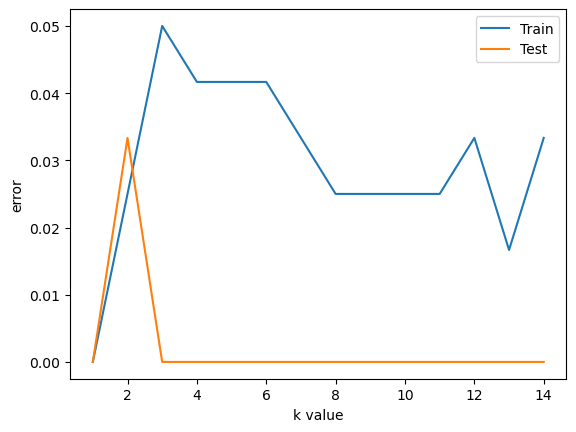

In [45]:
plt.plot(range(1, 15), error_train, label="Train")
plt.plot(range(1, 15), error_test, label="Test")
plt.xlabel("k value")
plt.ylabel("error")
plt.legend()
plt.show()